# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 08 (27-November-2017)

##  Debaraj Barua, Naresh Kumar Gurulingan

In [2]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from scipy.linalg import pinv

---
## Question 2: 5.10

2) The purpose of this computer experiment is to investigate the clustering process performed by the K-means algorithm. To provide insight into the experiment, we fix the number of clusters at K = 6, but vary the vertical separation between the two moons in Fig. 1.8. Specifically, the requirement is to do the following, using an unlabeled training sample of 1,000 data points picked randomly from the two regions of the double-moon pictured in Fig. 1.8:

* (a) Experimentally, determine the mean $\hat\mu_j$ and variance $\hat\sigma_j^2$, j = 1,2,3,...,6, for the sequence of eight uniformly spaced vertical separations starting at d = 1 and reducing them by one till the final separation d = - 6 is reached.

* (b) In light of the results obtained in part (a), comment on how the mean $\hat\mu_j$ of cluster j is affected by reducing the separation d for j = 1, 2, and 3.

* (c) Plot the variance $\hat\sigma_j^2$ versus the separation d for j = 1, 2, ..., 6.

* (d) Compare the common $\sigma^2$ computed in accordance with the empirical formula of Eq. (5.49) with the trends exhibited in the plots obtained in part (c).

Eq. (5.49) $\implies \sigma = \frac{d_{max}}{\sqrt{2K}}$

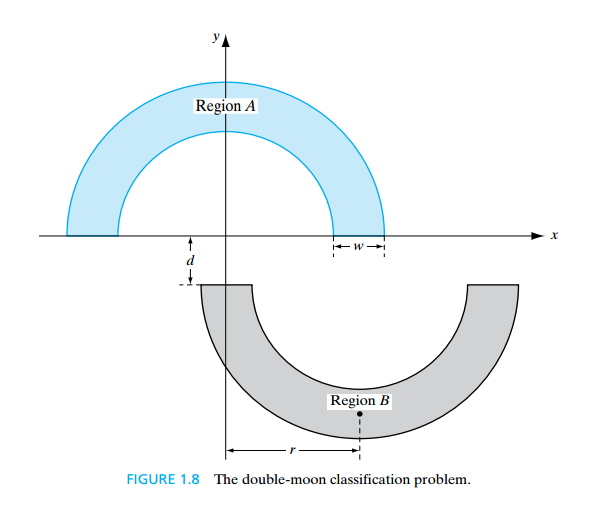

In [3]:
IPython.display.Image('images/fig_1.8.png', embed= True)

In [4]:
RADIUS = 10
WIDTH = 6

R_INNER = RADIUS - WIDTH/2
R_OUTER = RADIUS + WIDTH/2
THETA = np.linspace(0, 2*np.pi, 200)

def generate_points(d, size= None):
    """
        This function generates random points from
        the moons...
    """
    np.random.seed(0)
    size_desired=size
    size=size*10
    r_red = np.random.uniform(R_INNER, R_OUTER, size= size)
    theta_red = np.random.uniform(0, 2*np.pi, size= size)
    r_black = np.random.uniform(R_INNER, R_OUTER, size= size)
    theta_black = np.random.uniform(0, 2*np.pi, size= size)
    
    x_r = r_red * np.cos(theta_red)
    y_r = np.abs(r_red * np.sin(theta_red))
    x_b = r_black * np.cos(theta_black)
    y_b = np.abs(r_black * np.sin(theta_black))
    red_moon = np.array([x_r, y_r]).T
    black_moon = np.array([x_b + RADIUS, -y_b - d]).T
    
    uniform_datapts=np.vstack((red_moon, black_moon))
    random_idx = np.random.randint(uniform_datapts.shape[0], size=size_desired)
    random_pts=uniform_datapts[random_idx,:]
    return random_pts

In [5]:
def plot_data(d, data, title= None, plt_moon=True,centers=None,variances=None):
    """
        Plots the  labelled data
    """
    x_red_inner = R_INNER * np.cos(THETA)
    y_red_inner = np.abs(R_INNER * np.sin(THETA))
    x_red_outer = R_OUTER * np.cos(THETA)
    y_red_outer = np.abs(R_OUTER * np.sin(THETA))

    x_black_inner = x_red_inner + RADIUS
    y_black_inner = -y_red_inner - d
    x_black_outer = x_red_outer + RADIUS
    y_black_outer = -y_red_outer - d
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.title(title)
    plt.plot([0, 0], [-15, 15], color= 'k', linewidth= 2)
    plt.plot([-15, 15], [0, 0], color= 'k', linewidth= 2)
    if (plt_moon):
        plt.plot(x_red_inner, y_red_inner, color= 'r', linewidth= 2)
        plt.plot(x_red_outer, y_red_outer, color= 'r', linewidth= 2)
        plt.plot(x_black_inner, y_black_inner, color= 'k', linewidth= 2)
        plt.plot(x_black_outer, y_black_outer, color= 'k', linewidth= 2)
    if data.shape[1]<3:
        plt.scatter(data[:,0], data[:,1], c='k')
    else:
        plt.scatter(data[:,0], data[:,1], c= data[:,2],cmap=plt.cm.Paired)
    if centers is not None:
        plt.scatter(centers[:,0],centers[:,1],c='k',label='center')
        for i in xrange(6):
            circle = plt.Circle(centers[i,:], np.ndarray.min(variances[i,:]), color='blue',fill=False)
            ax.add_artist(circle)            
        plt.legend()
    plt.show()

In [6]:
def k_mean(K,d,train_data):
    print"--------------------"
    print"d: ",d    
    np.random.seed(0)
    center_idx = np.random.randint(train_data.shape[0], size=K)
    centers=train_data[center_idx,:]
    centers=centers[:,:2]
    #plot_data(1,centers,"Unlabelled Initial Center Points")
    #plot_data(1,centers,"Unlabelled Initial Center Points",plt_moon=False)
    MAX_ITERATION=100
    means=centers.copy()
    variance=np.zeros((means.shape))
    clustered_data=train_data
    clustered_data=np.insert(clustered_data, 2, -1, axis= 1)
    #plot_data(1,means,"MeanPoints")
    cont=True
    iteration=0
    while(cont):
        iteration+=1
        for idx,data in enumerate(train_data):
            dist=1000
            label=-1
            for i,meand in enumerate(means):
                if np.linalg.norm(data-meand)<dist:
                    dist=np.linalg.norm(data-meand)
                    label=i+1
            clustered_data[idx,2]=label
        #if(iteration==1):
            #plot_data(d,clustered_data,title="Initial Clusters",centers=means)
        old_means=means.copy()
        for i,cluster in enumerate(np.unique(clustered_data[:,2])):
            data_in_cluster=clustered_data[np.where(clustered_data[:,2]==cluster)]
            means[i]=np.mean(data_in_cluster[:,:2],axis=0)
            variance[i]=np.var(data_in_cluster[:,:2],axis=0)
        if iteration>MAX_ITERATION or np.allclose(old_means,means):
            cont=False
    print "Number of Iterations:",iteration
    plot_data(d,clustered_data,title="Final Clusters",centers=means,variances=variance)    
    return means,variance

--------------------
d:  1
Number of Iterations: 12


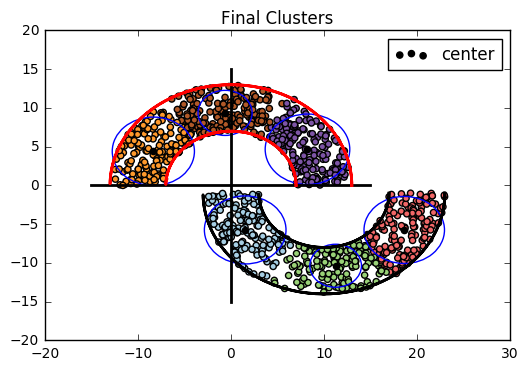

d:  1 , 
 mean:
  [[  1.53384649  -5.74065645]
 [ 11.25995174 -10.36174452]
 [ 18.63630696  -5.74250146]
 [ -8.34342405   4.4016335 ]
 [  8.23108037   4.66379749]
 [ -0.62948235   9.36226209]] 
 variance:  [[ 4.38872697  6.79128468]
 [ 7.76869246  2.77575795]
 [ 4.32652419  7.79908737]
 [ 4.41817262  5.80099227]
 [ 4.54800008  7.64537411]
 [ 8.21272432  2.90803315]]
--------------------
d:  0
Number of Iterations: 12


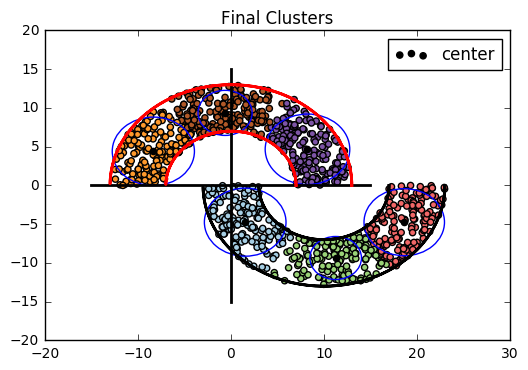

d:  0 , 
 mean:
  [[  1.53384649  -4.74065645]
 [ 11.25995174  -9.36174452]
 [ 18.63630696  -4.74250146]
 [ -8.34342405   4.4016335 ]
 [  8.23108037   4.66379749]
 [ -0.62948235   9.36226209]] 
 variance:  [[ 4.38872697  6.79128468]
 [ 7.76869246  2.77575795]
 [ 4.32652419  7.79908737]
 [ 4.41817262  5.80099227]
 [ 4.54800008  7.64537411]
 [ 8.21272432  2.90803315]]
--------------------
d:  -1
Number of Iterations: 10


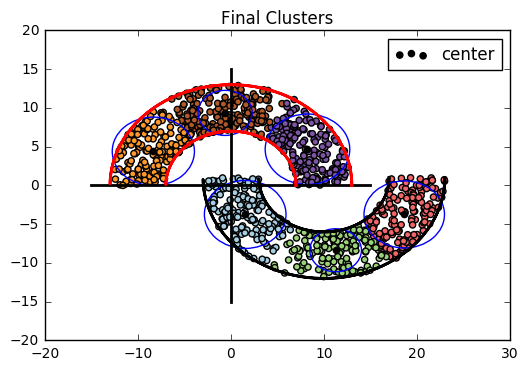

d:  -1 , 
 mean:
  [[  1.53384649  -3.74065645]
 [ 11.25995174  -8.36174452]
 [ 18.63630696  -3.74250146]
 [ -8.34342405   4.4016335 ]
 [  8.23108037   4.66379749]
 [ -0.62948235   9.36226209]] 
 variance:  [[ 4.38872697  6.79128468]
 [ 7.76869246  2.77575795]
 [ 4.32652419  7.79908737]
 [ 4.41817262  5.80099227]
 [ 4.54800008  7.64537411]
 [ 8.21272432  2.90803315]]
--------------------
d:  -2
Number of Iterations: 9


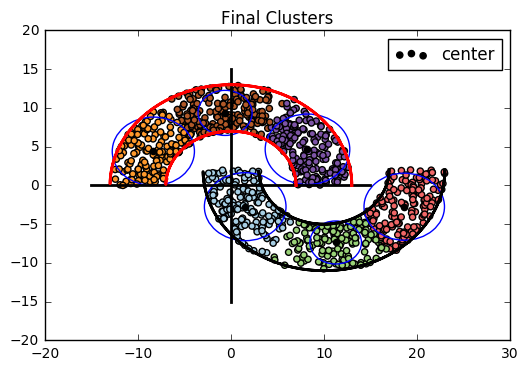

d:  -2 , 
 mean:
  [[  1.53384649  -2.74065645]
 [ 11.25995174  -7.36174452]
 [ 18.63630696  -2.74250146]
 [ -8.34342405   4.4016335 ]
 [  8.23108037   4.66379749]
 [ -0.62948235   9.36226209]] 
 variance:  [[ 4.38872697  6.79128468]
 [ 7.76869246  2.77575795]
 [ 4.32652419  7.79908737]
 [ 4.41817262  5.80099227]
 [ 4.54800008  7.64537411]
 [ 8.21272432  2.90803315]]
--------------------
d:  -3
Number of Iterations: 8


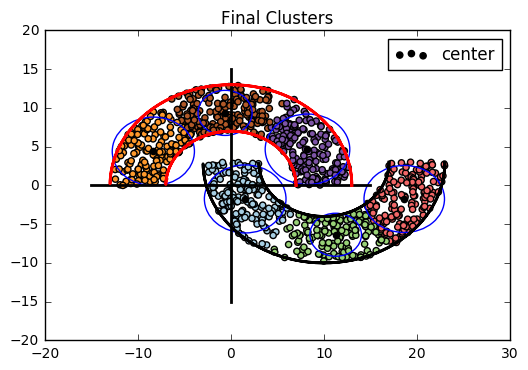

d:  -3 , 
 mean:
  [[  1.53384649  -1.74065645]
 [ 11.25995174  -6.36174452]
 [ 18.63630696  -1.74250146]
 [ -8.34342405   4.4016335 ]
 [  8.23108037   4.66379749]
 [ -0.62948235   9.36226209]] 
 variance:  [[ 4.38872697  6.79128468]
 [ 7.76869246  2.77575795]
 [ 4.32652419  7.79908737]
 [ 4.41817262  5.80099227]
 [ 4.54800008  7.64537411]
 [ 8.21272432  2.90803315]]
--------------------
d:  -4
Number of Iterations: 11


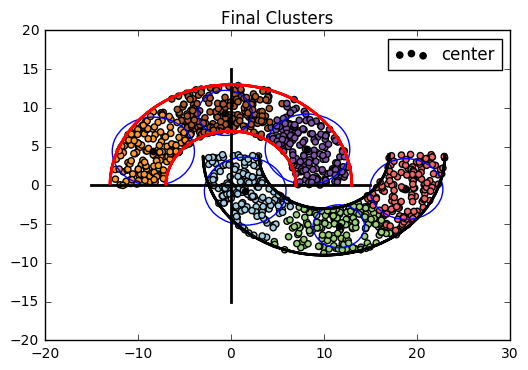

d:  -4 , 
 mean:
  [[  1.53384649  -0.74065645]
 [ 11.59547637  -5.27132635]
 [ 18.86557725  -0.46878889]
 [ -8.34342405   4.4016335 ]
 [  8.23108037   4.66379749]
 [ -0.62948235   9.36226209]] 
 variance:  [[ 4.38872697  6.79128468]
 [ 8.64273356  2.76755409]
 [ 3.92374401  7.31852224]
 [ 4.41817262  5.80099227]
 [ 4.54800008  7.64537411]
 [ 8.21272432  2.90803315]]
--------------------
d:  -5
Number of Iterations: 11


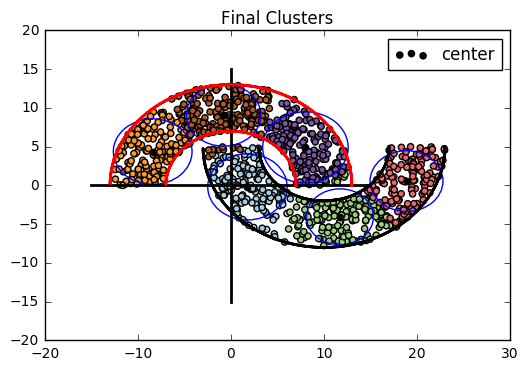

d:  -5 , 
 mean:
  [[  1.77476016  -0.18347103]
 [ 11.72524703  -4.04161889]
 [ 18.8801906    0.56248351]
 [ -8.41275389   4.35620142]
 [  8.00782483   4.90639428]
 [ -0.78836102   9.07054869]] 
 variance:  [[ 4.26834098  6.2130706 ]
 [ 7.80778294  3.60056825]
 [ 3.91843687  7.22225516]
 [ 4.23165474  5.78999409]
 [ 4.59664062  7.3697661 ]
 [ 7.64605868  4.00128272]]
--------------------
d:  -6
Number of Iterations: 8


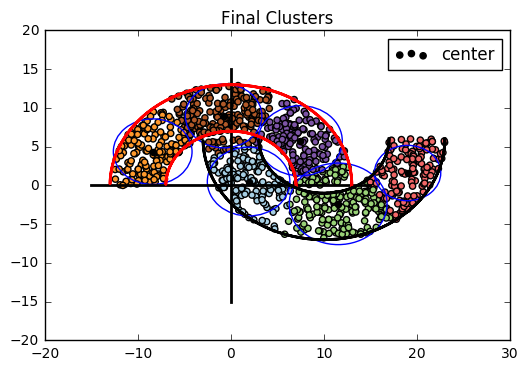

d:  -6 , 
 mean:
  [[  1.89840369   0.4986249 ]
 [ 11.52871362  -2.37466708]
 [ 18.99119638   1.60078547]
 [ -8.41275389   4.35620142]
 [  7.44457906   5.76675746]
 [ -0.78789073   8.96938824]] 
 variance:  [[ 4.43755654  5.20751386]
 [ 7.44748017  5.26116175]
 [ 3.56972367  7.3628316 ]
 [ 4.23165474  5.78999409]
 [ 4.52641569  4.93099869]
 [ 7.34677749  4.11692754]]


In [7]:
K=6
mean_arr=[]
var_arr=[]
for d in xrange(1,-7,-1):
    train_data=generate_points(d,size=1000)
    means,variance=k_mean(K,d,train_data.copy())
    print "d: ",d, ", \n mean:\n ", means, "\n variance: ",variance
    mean_arr.append(means)
    var_arr.append(variance)


## Question 3:
3) Repeat the Ex3 from the MPL assignment (topic :: BP) with the Radial Basis Functions

Investigate the use of Radial Basis Functions to achieve one-to-one mappings, as described here:

1. F(x) = 1/x 1<=x<=100

2. F(x) = $log_{10}x$ 1<=x<=10

3. F(x) = exp(-x) 1<=x<=10

4. F(x) = sin(x) 0<=x<=$\frac{\pi}{2}$

For each mapping, do the following:

* (a) Set up two sets of data, one for network training, and the other for testing.

* (b) Use the training data set to compute the synaptic weights of the network, assumed to have a single hidden layer.

* (c) Evaluate the computation accuracy of the network by using the test data. Use a single hidden layer but with a variable number of hidden neurones. Investigate how the network performance is affected by varying the size of the hidden layer.

For solving this problem you have to use your own implementation of RBF but you do not need to implement K-means algorithm yourself.

In [8]:
class Radial_Basis_Function_Network():
    
    def __init__(self, K= 5):
        self.K = K
        self.weights = np.random.rand(self.K, 1)
      
    def unsupervised_params(self, data):
        
        cluster = KMeans(n_clusters= self.K)
        cluster.fit(data)
        centers = cluster.cluster_centers_
        d_max = np.max(cdist(centers, centers))
        sigma = d_max/np.sqrt(2*self.K)
        return centers, sigma
    
    def rbf(self, data, c, sig):
        
        return np.exp(-(np.linalg.norm(data - c, axis= 1, keepdims= True)**2)
                      /(2 * sig**2))
        
    def train(self, data, t):
        
        self.centers, self.sigma = self.unsupervised_params(data)
    
        activations = np.zeros((data.shape[0], 1))
        for center in self.centers:
            activations = np.hstack((activations, self.rbf(data, center, self.sigma)))
        
        activations = activations[:,-self.K:]
        self.weights = np.dot(pinv(activations), t)
    
    def predict(self, data, y):
        
        activations = np.zeros((data.shape[0], 1))
        for center in self.centers:
            activations = np.hstack((activations, self.rbf(data, center, self.sigma)))
        
        activations = activations[:,-self.K:]
        predictions = np.dot(activations, self.weights)
        return 1 - np.mean(np.abs(predictions - y))

In [9]:
K_list = np.array([3, 5, 7, 9, 11, 13, 15])

def obtain_performance(data_x, data_y):
    data = np.hstack((data_x, data_y))
    train, test = train_test_split(data)

    accuracy = []
    for K in K_list:
        nn = Radial_Basis_Function_Network(K= K)
        nn.train(train[:,0].reshape(-1, 1), 
                 train[:,1].reshape(-1, 1))
        accuracy.append(nn.predict(test[:,0].reshape(-1, 1), 
                              test[:,1].reshape(-1, 1)))
    
    return np.array(accuracy)

def plot_results(result, title):
    plt.plot(result[:,0], result[:,1], color= 'b')
    plt.scatter(result[:,0], result[:,1], color= 'g')
    plt.xlabel('Number of clusters')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.show()

## 1. Reciprocal:

['number of clusters', 'accuracy']
[[  3.           0.96274917]
 [  5.           0.9702349 ]
 [  7.           0.97805657]
 [  9.           0.98264011]
 [ 11.           0.98702036]
 [ 13.           0.99089268]
 [ 15.           0.99350616]]


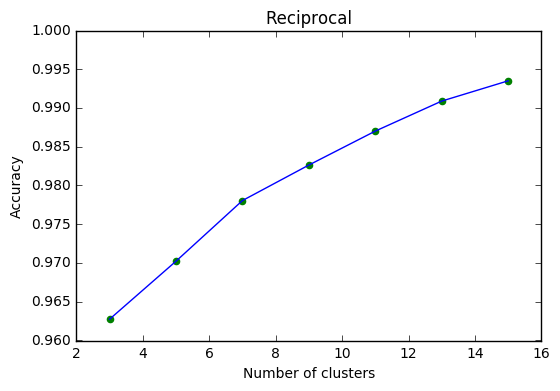

In [10]:
# generating x...
reciprocal_x = np.linspace(1, 101, 1000).reshape(-1, 1)
# generating y...
reciprocal_y = 1/reciprocal_x

accuracy =  obtain_performance(reciprocal_x, reciprocal_y)
result = np.hstack((K_list.reshape(-1, 1), accuracy.reshape(-1, 1)))

print ['number of clusters', 'accuracy']
print result

plot_results(result, 'Reciprocal')

## 2. Log:

['number of clusters', 'accuracy']
[[  3.           0.92549352]
 [  5.           0.97387425]
 [  7.           0.99192108]
 [  9.           0.99743685]
 [ 11.           0.99917476]
 [ 13.           0.99972966]
 [ 15.           0.99989323]]


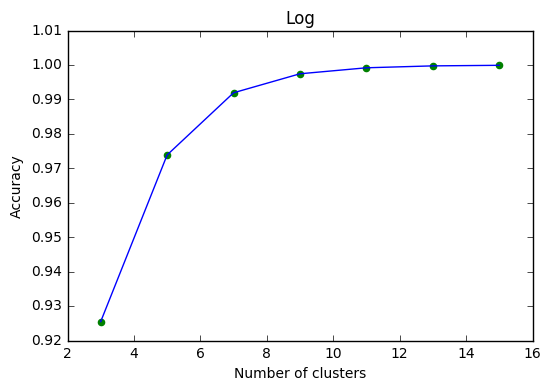

In [11]:
# generating x...
log_x = np.linspace(1, 11, 1000).reshape(-1, 1)
# generating y...
log_y = np.log10(log_x)

accuracy =  obtain_performance(log_x, log_y)
result = np.hstack((K_list.reshape(-1, 1), accuracy.reshape(-1, 1)))

print ['number of clusters', 'accuracy']
print result

plot_results(result, 'Log')

## 3. Exponential:

['number of clusters', 'accuracy']
[[  3.           0.96518958]
 [  5.           0.98491113]
 [  7.           0.99366049]
 [  9.           0.99755883]
 [ 11.           0.99940331]
 [ 13.           0.99986519]
 [ 15.           0.99994021]]


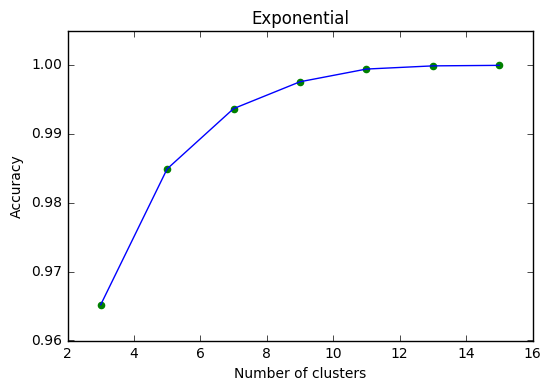

In [12]:
# generating x...
exp_x = np.linspace(1, 11, 1000).reshape(-1, 1)
# generating y...
exp_y = np.exp(-exp_x)

accuracy =  obtain_performance(exp_x, exp_y)
result = np.hstack((K_list.reshape(-1, 1), accuracy.reshape(-1, 1)))

print ['number of clusters', 'accuracy']
print result

plot_results(result, 'Exponential')

## 4. Sinusoid:

['number of clusters', 'accuracy']
[[  3.           0.94239183]
 [  5.           0.98589547]
 [  7.           0.99690691]
 [  9.           0.99904038]
 [ 11.           0.99975268]
 [ 13.           0.99994482]
 [ 15.           0.9999851 ]]


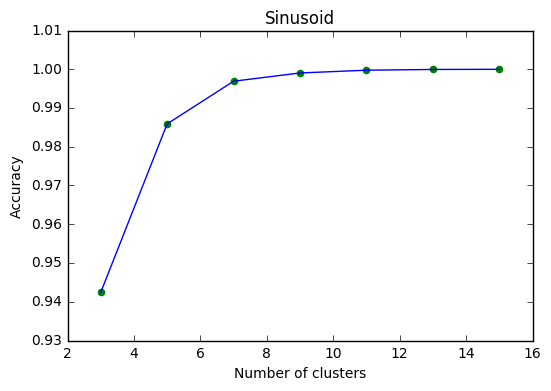

In [13]:
# generating x...
sin_x = np.linspace(0, np.pi/2, 1000).reshape(-1, 1)
# generating y...
sin_y = np.sin(sin_x)

accuracy =  obtain_performance(sin_x, sin_y)
result = np.hstack((K_list.reshape(-1, 1), accuracy.reshape(-1, 1)))

print ['number of clusters', 'accuracy']
print result

plot_results(result, 'Sinusoid')